In [ ]:
#!pip install numpy pandas matplotlib seaborn sklearn lightgbm xgboost catboost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_log_error, r2_score,mean_absolute_percentage_error

In [2]:
!pip install lightgbm

In [22]:
!pip install xgboost

  Using cached xgboost-1.6.2-py3-none-win_amd64.whl (125.4 MB)


In [24]:
!pip install catboost

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [3]:
data = pd.read_csv("bmw_prep.csv")
data.head()

,year,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,selling_price
0,2015,1 Series,10388,Manual,28640,Diesel,0,83.1,1.5,4794.0620
1,2017,1 Series,22991,Semi-Auto,15709,Petrol,145,39.8,3.0,13532.5026
2,2019,1 Series,31790,Semi-Auto,8211,Petrol,145,34.5,2.0,24328.8870
3,2017,1 Series,19490,Manual,10,Petrol,125,53.3,1.5,11471.8140
4,2015,1 Series,9600,Manual,30755,Diesel,0,83.1,1.5,4430.4000


In [4]:
#Basic EDA
# Check the shape of data
data.shape

(10781, 10)

In [5]:
# Check column names of the data
data.columns

Index(['year', 'model', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'selling_price'],
      dtype='object')

In [6]:
data['fuelType'].value_counts()

Diesel      7027
Petrol      3417
Hybrid       334
Electric       3
Name: fuelType, dtype: int64

In [7]:
data['transmission'].value_counts()

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64

In [8]:
# Check for missing values
data.isnull().sum()

year             0
model            0
price            0
transmission     0
mileage          0
fuelType         0
tax              0
mpg              0
engineSize       0
selling_price    0
dtype: int64

In [68]:
# check for the datatypes amd other info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           10781 non-null  int64  
 1   model          10781 non-null  object 
 2   price          10781 non-null  int64  
 3   transmission   10781 non-null  object 
 4   mileage        10781 non-null  int64  
 5   fuelType       10781 non-null  object 
 6   tax            10781 non-null  int64  
 7   mpg            10781 non-null  float64
 8   engineSize     10781 non-null  float64
 9   selling_price  10781 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 842.4+ KB


In [9]:
# check the statistics of data
print(data.describe())

               year          price        mileage           tax           mpg  \
count  10781.000000   10781.000000   10781.000000  10781.000000  10781.000000   
mean    2017.078935   22733.408867   25496.986550    131.702068     56.399035   
std        2.349038   11415.528189   25143.192559     61.510755     31.336958   
min     1996.000000    1200.000000       1.000000      0.000000      5.500000   
25%     2016.000000   14950.000000    5529.000000    135.000000     45.600000   
50%     2017.000000   20462.000000   18347.000000    145.000000     53.300000   
75%     2019.000000   27940.000000   38206.000000    145.000000     62.800000   
max     2020.000000  123456.000000  214000.000000    580.000000    470.800000   

         engineSize  selling_price  
count  10781.000000   10781.000000  
mean       2.167767   15289.092299  
std        0.552054   10162.129757  
min        0.000000     216.000000  
25%        2.000000    7673.400000  
50%        2.000000   12649.014000  
75%        

In [10]:
# lets see the Correlation between the features
print(data.corr())

                   year     price   mileage       tax       mpg  engineSize  \
year           1.000000  0.623756 -0.774382  0.025200 -0.071762   -0.026337   
price          0.623756  1.000000 -0.605397  0.263484 -0.204882    0.460196   
mileage       -0.774382 -0.605397  1.000000 -0.170747  0.118609   -0.002540   
tax            0.025200  0.263484 -0.170747  1.000000 -0.351798    0.429616   
mpg           -0.071762 -0.204882  0.118609 -0.351798  1.000000   -0.399844   
engineSize    -0.026337  0.460196 -0.002540  0.429616 -0.399844    1.000000   
selling_price  0.715037  0.976227 -0.661548  0.221773 -0.204086    0.356246   

               selling_price  
year                0.715037  
price               0.976227  
mileage            -0.661548  
tax                 0.221773  
mpg                -0.204086  
engineSize          0.356246  
selling_price       1.000000  


C:\Users\Administrateur\AppData\Local\Temp\ipykernel_8932\1085274482.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


C:\Users\Administrateur\AppData\Local\Temp\ipykernel_8932\2891409145.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


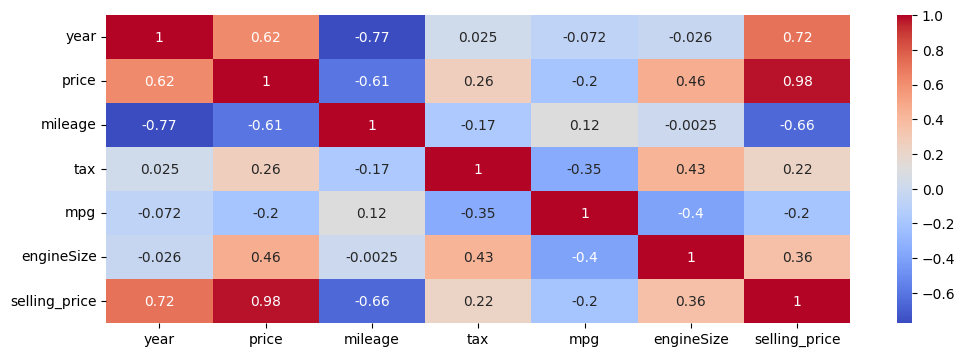

In [11]:
# Plot the heatmap
plt.figure(figsize=(12, 4))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [12]:
#Basic Preprocessing
# Lets encode the text features using Label Encoding
le = LabelEncoder()
data['fuelType'] = le.fit_transform(data.fuelType.values)

data['transmission'] = le.fit_transform(data.transmission.values)
data.head()

,year,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,selling_price
0,2015,1 Series,10388,1,28640,0,0,83.1,1.5,4794.0620
1,2017,1 Series,22991,2,15709,3,145,39.8,3.0,13532.5026
2,2019,1 Series,31790,2,8211,3,145,34.5,2.0,24328.8870
3,2017,1 Series,19490,1,10,3,125,53.3,1.5,11471.8140
4,2015,1 Series,9600,1,30755,0,0,83.1,1.5,4430.4000


In [13]:
#Petrol=3, Hybrid=2, Electric=1, Diesel=0
data['fuelType'].values
data.fuelType.unique()

array([0, 3, 2, 1])

In [14]:
#Automatic=0, Manual=1, Semi-Auto=2
data.transmission.unique()

array([1, 2, 0])

In [15]:
# Target column is Selling Price
predict = "selling_price"
data = data[["year", "mileage", 
             "price", "fuelType", "transmission", 
             "engineSize", "selling_price"]]

In [16]:
# Split dataset into input (other than selling price) and output (Selling Price)
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_8932\757806913.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


In [17]:
# Now split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
#Model Building

In [19]:
# Train all 7 models on x_train and y_train
lrmodel=LinearRegression().fit(x_train,y_train)
dt_model = DecisionTreeRegressor().fit(x_train,y_train)
rf_model=RandomForestRegressor().fit(x_train,y_train)
gbm_model=GradientBoostingRegressor().fit(x_train,y_train)
lgbm_model=LGBMRegressor().fit(x_train,y_train)
xgb_model= XGBRegressor().fit(x_train,y_train)
catb_model= CatBoostRegressor().fit(x_train,y_train)

Learning rate set to 0.057547
0:	learn: 9648.7408128	total: 172ms	remaining: 2m 52s
1:	learn: 9141.8219335	total: 179ms	remaining: 1m 29s
2:	learn: 8673.9037935	total: 183ms	remaining: 1m
3:	learn: 8229.1251680	total: 187ms	remaining: 46.6s
4:	learn: 7807.0858600	total: 190ms	remaining: 37.9s
5:	learn: 7419.8642561	total: 194ms	remaining: 32.1s
6:	learn: 7046.4241436	total: 197ms	remaining: 27.9s
7:	learn: 6687.0069678	total: 199ms	remaining: 24.7s
8:	learn: 6360.0723375	total: 202ms	remaining: 22.2s
9:	learn: 6047.1109954	total: 204ms	remaining: 20.2s
10:	learn: 5732.2188326	total: 206ms	remaining: 18.5s
11:	learn: 5454.7435768	total: 208ms	remaining: 17.2s
12:	learn: 5178.6211441	total: 211ms	remaining: 16s
13:	learn: 4915.5344107	total: 213ms	remaining: 15s
14:	learn: 4663.6309362	total: 215ms	remaining: 14.1s
15:	learn: 4439.2987099	total: 218ms	remaining: 13.4s
16:	learn: 4221.0907371	total: 220ms	remaining: 12.7s
17:	learn: 4011.1514500	total: 222ms	remaining: 12.1s
18:	learn: 38

In [27]:
#Evaluating Models

In [20]:
# define function to evaluate all these 7 models
def evaluate_model(model,x_test,y_test):
    prediction=model.predict(x_test)
    print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
    print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test,prediction))
    print("Mean Squared Error:",mean_squared_error(y_test,prediction))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediction)))
    print("R2 Score:",r2_score(y_test,prediction))

In [21]:
# Lets evaluate these 7 models and see the results
print("LR_Model:")
print(evaluate_model(lrmodel,x_test,y_test))
print()
print("DT_Model:")
print(evaluate_model(dt_model,x_test,y_test))
print()
print("RF_Model:")
print(evaluate_model(rf_model,x_test,y_test))
print()
print("GBM_Model:")
print(evaluate_model(gbm_model,x_test,y_test))
print()
print("LGBM_Model:")
print(evaluate_model(lgbm_model,x_test,y_test))
print()
print("XGB_Model:")
print(evaluate_model(xgb_model,x_test,y_test))
print()
print("CatBoost_Model:")
print(evaluate_model(catb_model,x_test,y_test))

LR_Model:
Mean Absolute Error: 1039.527592788092
Mean Absolute Percentage Error: 0.24046921023564805
Mean Squared Error: 2809379.2694546953
Root Mean Squared Error: 1676.1203027989056
R2 Score: 0.9725256279476655
None

DT_Model:
Mean Absolute Error: 27.15439958275401
Mean Absolute Percentage Error: 0.0029650328505192816
Mean Squared Error: 72344.49473483299
Root Mean Squared Error: 268.96931931882676
R2 Score: 0.9992925057909078
None

RF_Model:
Mean Absolute Error: 26.886110835884317
Mean Absolute Percentage Error: 0.002461948808514797
Mean Squared Error: 58028.55405209691
Root Mean Squared Error: 240.89116640528127
R2 Score: 0.9994325087747957
None

GBM_Model:
Mean Absolute Error: 189.90641355357081
Mean Absolute Percentage Error: 0.01817499616050699
Mean Squared Error: 97491.14320740664
Root Mean Squared Error: 312.2357173793649
R2 Score: 0.9990465837171185
None

LGBM_Model:
Mean Absolute Error: 94.70634665589048
Mean Absolute Percentage Error: 0.00876622891538568
Mean Squared Error:

In [25]:
# Predictions
# From above result, as r2 is comparitely high in XGB_Model and Decision Tree Model,
# so we will finalize this model, also now Lets do the prediction for x_test data
predictions = rf_model.predict(x_test)
predictions

array([ 7707.36384 , 37613.939168,  5230.08409 , ..., 10000.767222,
        2485.156328, 10559.651508])

In [29]:
# Let's do the prediction new unknown data 
# ["year", "mileage", "price", "fuelType", "transmission", "engineSize", "selling_price"]
input=[[2018,30000,35000,3,1,3.0]]
price = rf_model.predict(input)
print(price.round(1)[0],"in £")

23936.2 in £


In [30]:
# Save the model in pickle file
import pickle
pickle.dump(rf_model,open("car_price_predictor_model.pkl","wb"))